In [37]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import seaborn as sns
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore') # 경고 메시지 무시

In [10]:
iris = load_iris()
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)


DecisionTreeClassifier(random_state=156)

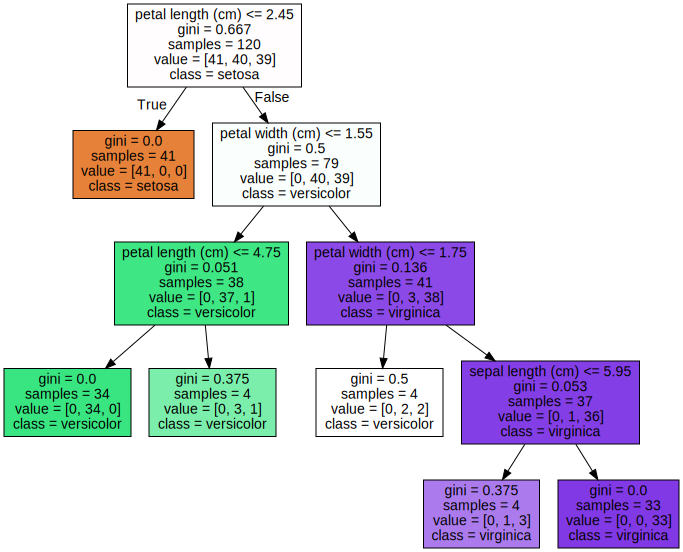

In [24]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=4)
dt_clf.fit(X_train, Y_train)
export_graphviz(dt_clf, 'tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)
with open('./tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

sepal length (cm) 0.005947267560959518
sepal width (cm) 0.0
petal length (cm) 0.5459484001108248
petal width (cm) 0.44810433232821567


<AxesSubplot:>

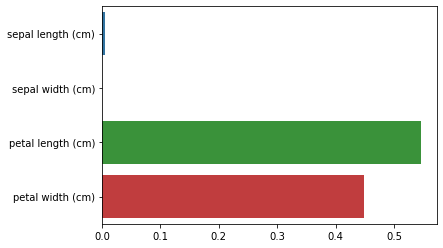

In [30]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(name, value)
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

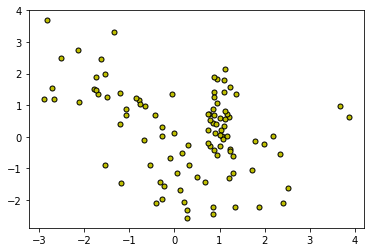

In [33]:
X, Y = make_classification(n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c='y', s=25, edgecolors='k')


In [35]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
        clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
        levels=np.arange(n_classes + 1) - 0.5,
        cmap='rainbow', clim=(y.min(), y.max()),
        zorder=1)

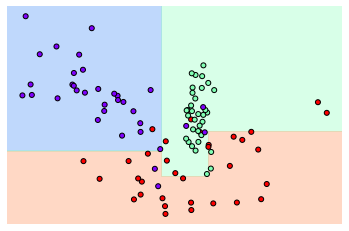

In [39]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=6).fit(X, Y)
visualize_boundary(dt_clf, X, Y)